In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,os.path

In [24]:
def fesplot(sim_name,num):
    # plot a 1D FES
    # Energy vs Distance from surface
    # total = 2811
    total = len(os.listdir('fesfiles/'+sim_name))-1
    percent =[0.8,0.9,1] # chose progress to plot
    for i in percent:
        data = np.genfromtxt('fesfiles/'+sim_name+'/fes_{}.dat'.format(int(total*i)),comments='#')
        X = data[:,0]
        Y = data[:,1]
        ax.flat[num].plot(X,Y,label='{}ns'.format(int(total*i)))
        ax.flat[num].legend(loc='upper center')
        ax.flat[num].set_ylim(0,60)
        ax.flat[num].set_title(sim_name)


In [9]:
def convg(sim_name,bound_left, bound_right, un_bound_left, un_bound_right):
    # define the bound region and unbound region
    total = len(os.listdir('fesfiles/'+sim_name))
    
    T = 300
    KT = T * 0.0083144621

    E_diff = np.zeros(total)
    
    for i in range(total):
        data = np.genfromtxt('fesfiles/'+sim_name+'/fes_{}.dat'.format(i),comments='#')
        X = data[:,0]
        Y = data[:,1]
        bound = 0
        un_bound = 0
        for j in range(X.shape[0]):
            if (X[j]>=bound_left and X[j]<=bound_right):
                bound += np.exp(-Y[j]/KT)
            if (X[j]>=un_bound_left and X[j]<=un_bound_right):
                un_bound += np.exp(-Y[j]/KT)
        bound = -KT * np.log(bound)
        un_bound = -KT * np.log(un_bound)
        E_diff[i] = un_bound - bound
    plt.plot(np.arange(total)/10,E_diff,label=sim_name)



In [10]:
def HILLS(sim_name, num):
    data = np.genfromtxt('fesfiles/HILLS/'+sim_name,comments='#')
    ax.flat[num*2].scatter(data[:,0],data[:,1], s=0.1)
    #ax.flat[num*2].set_ylim(0,60)
    ax.flat[num*2].set_title(sim_name+' z')
    ax.flat[num*2+1].scatter(data[:,0],data[:,3],s=0.1)
    #ax.flat[num*2+1].set_ylim(0,60)
    ax.flat[num*2+1].set_title(sim_name+' HILLS')

In [ ]:
f, ax = plt.subplots(3,3,figsize = (20,20))
fesplot('DDD_TIO',0)
fesplot('DSS_TIO',1)
fesplot('DSpSp_TIO',2)
fesplot('DDD_SIO',3)
fesplot('DSS_SIO',4)
fesplot('DSpSp_SIO',5)
fesplot('DDD_SIO_FLEX',6)
fesplot('DSS_SIO_FLEX',7)
fesplot('DSpSp_SIO_FLEX',8)
#plt.xlabel('Distance from surface(nm)')
#plt.ylabel('Energy (KJ/mol)')
#plt.rcParams.update({'font.size': 8})
#plt.title("Energy vs Distance from Surface")

plt.show()

/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log


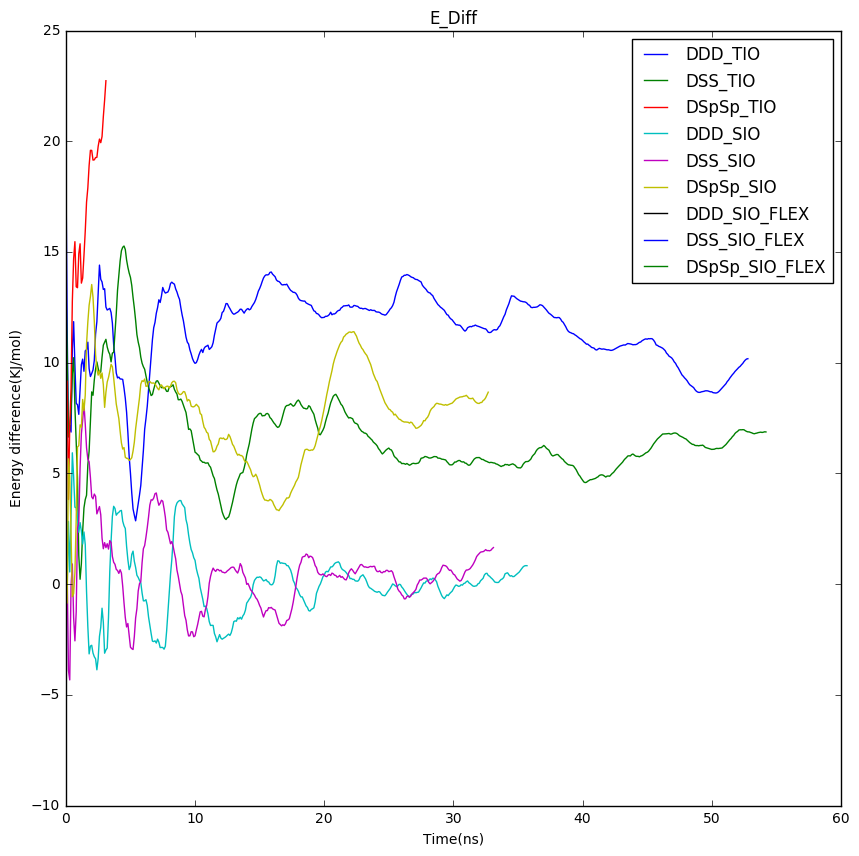

In [22]:
plt.figure(figsize=(10,10))
convg('DDD_TIO', 0.4,0.9,1.3,1.5)
convg('DSS_TIO', 0.4,0.9,1.2,1.5)
convg('DSpSp_TIO',0.3,0.9,1.3,1.6)
convg('DDD_SIO', 0.3,0.75,1.3,1.6)
convg('DSS_SIO',0.3,0.7,1.3,1.6)
convg('DSpSp_SIO', 0.3,0.8, 1.3,1.6)
convg('DDD_SIO_FLEX', 0.3,0.75,1.3,1.6)
convg('DSS_SIO_FLEX',0.3,0.7,1.3,1.6)
convg('DSpSp_SIO_FLEX', 0.3,0.8, 1.3,1.6)
plt.title("E_Diff")
plt.xlabel("Time(ns)")
plt.ylabel("Energy difference(KJ/mol)")
plt.legend(loc='best')
plt.show()

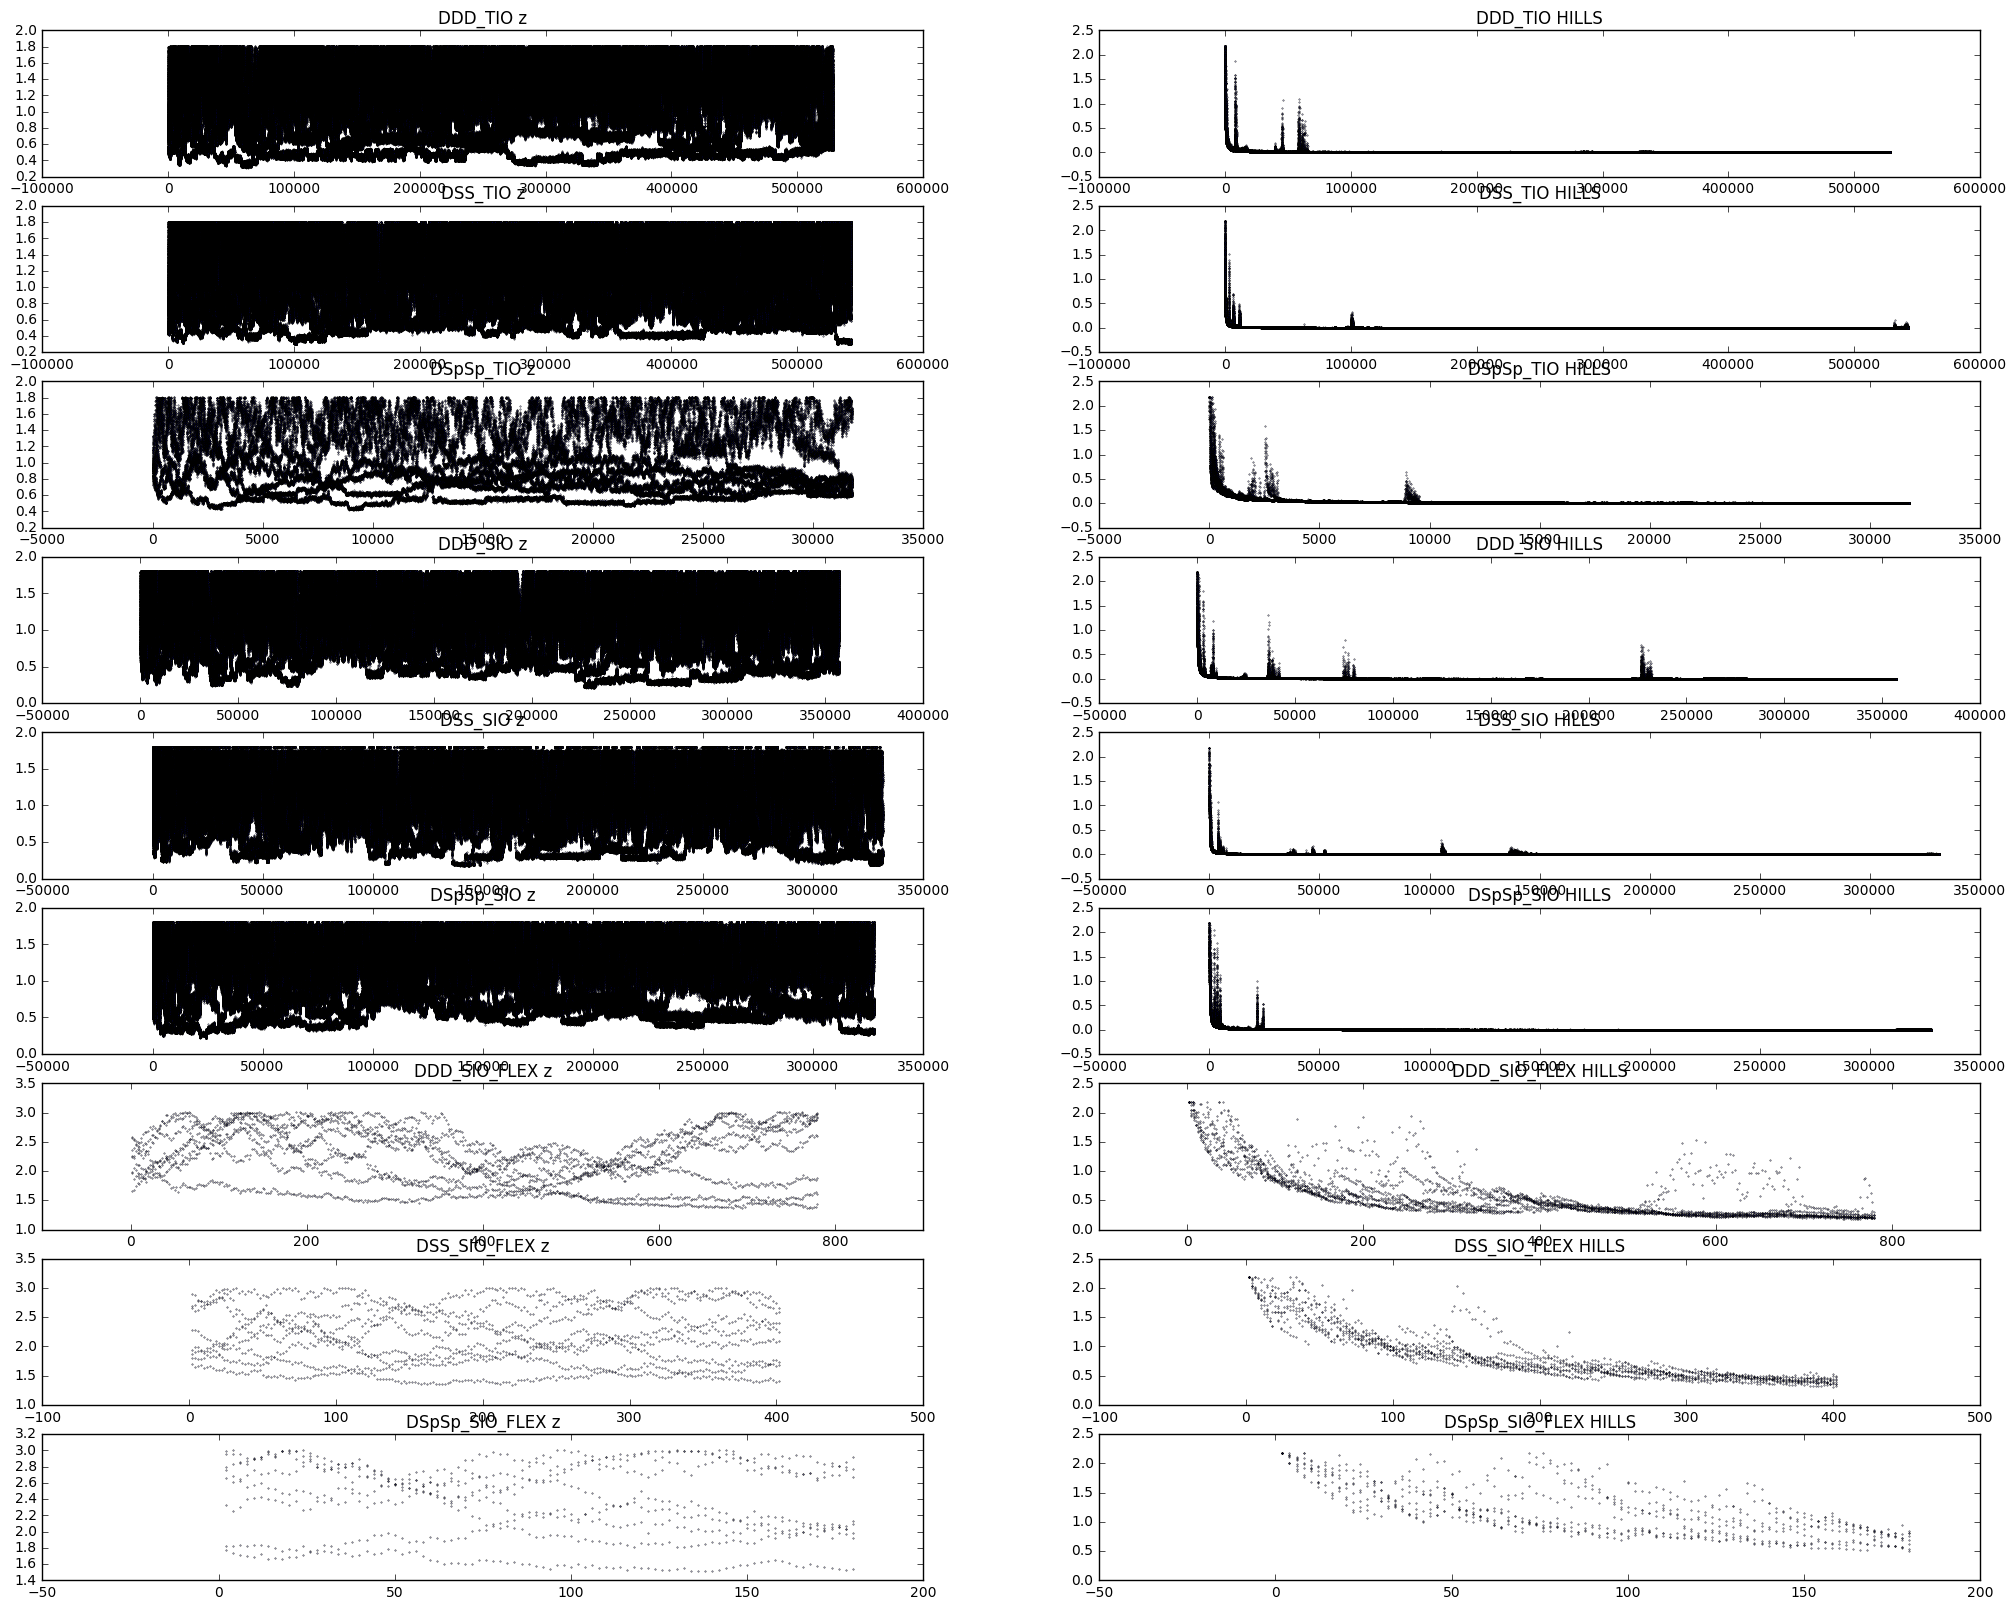

In [23]:
f, ax = plt.subplots(9,2,figsize = (25,20))
HILLS('DDD_TIO',0)
HILLS('DSS_TIO',1)
HILLS('DSpSp_TIO',2)
HILLS('DDD_SIO',3)
HILLS('DSS_SIO',4)
HILLS('DSpSp_SIO',5)
HILLS('DDD_SIO_FLEX',6)
HILLS('DSS_SIO_FLEX',7)
HILLS('DSpSp_SIO_FLEX',8)
plt.show()